In [1]:
import pandas as pd
from datetime import datetime

df = pd.read_csv('../input/market-basket-analysis/Assignment-1_Data.csv',sep=';')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


**Temos valores faltantes para Itemname e CustomerID. Para agilizar algumas transformações futuras, seguiu-se com a substituição desses valores pela string "NONE"**

In [4]:
df = df.fillna('NONE')

### Ajuste de campos

In [5]:
df['Date'] = [(datetime.strptime(str(d).split(' ')[0],'%d.%m.%Y').strftime('%Y-%m-%d')) 
              for d in df['Date']]

df['Price'] = [float(p.replace(',','.')) for p in df['Price']]

df['CustomerID'] = [(str(c).split('.'))[0] if c != 'NONE' else c for c in df['CustomerID']]

### Inspeção de alguns campos

In [6]:
print('Itens com quantitade negativa:',df[df.Quantity<0].shape[0])
print('Itens sem descrição: ',df[df.Itemname=='NONE'].shape[0])
print('Itens sem preço: ',df[df.Price==0].shape[0])

Itens com quantitade negativa: 1336
Itens sem descrição:  1455
Itens sem preço:  2511


**Itens sem preço que possuem descrição em minúsculo condizem com itens em retorno, danificados, etc.**

In [7]:
df[(df.Price==0)&(df.Itemname.str.islower()==True)]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
6275,536941,amazon,20,2010-12-03,0.0,NONE,United Kingdom
6276,536942,amazon,15,2010-12-03,0.0,NONE,United Kingdom
12926,537425,check,-20,2010-12-06,0.0,NONE,United Kingdom
12927,537426,check,-35,2010-12-06,0.0,NONE,United Kingdom
12973,537432,damages,-43,2010-12-06,0.0,NONE,United Kingdom
...,...,...,...,...,...,...,...
515635,581211,check,14,2011-12-07,0.0,NONE,United Kingdom
515636,581212,lost,-1050,2011-12-07,0.0,NONE,United Kingdom
515637,581213,check,-30,2011-12-07,0.0,NONE,United Kingdom
517209,581226,missing,-338,2011-12-08,0.0,NONE,United Kingdom


**Itens sem preço que possuem descrição em maiúsculo condizem com itens sem descrição, na maioria dos casos e para aquele com descrição, muitas vezes possuem quantidades maior que 0, mas sem valor, o que não condiz com o senso comum**

In [8]:
df[(df.Price==0)&(df.Itemname.str.islower()==False)].sample(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
105732,545599,NONE,-140,2011-03-04,0.0,NONE,United Kingdom
301841,564530,FRENCH BLUE METAL DOOR SIGN 7,1,2011-08-25,0.0,NONE,United Kingdom
101118,545176,GLASS JAR DIGESTIVE BISCUITS,1,2011-02-28,0.0,NONE,United Kingdom
204268,555387,NONE,-59,2011-06-02,0.0,NONE,United Kingdom
81220,543310,NONE,-234,2011-02-07,0.0,NONE,United Kingdom
142482,549136,NONE,-3,2011-04-06,0.0,NONE,United Kingdom
222318,557138,NONE,2,2011-06-17,0.0,NONE,United Kingdom
163784,551201,NONE,-620,2011-04-27,0.0,NONE,United Kingdom
21239,538130,NONE,10,2010-12-09,0.0,NONE,United Kingdom
438136,575615,??,-130,2011-11-10,0.0,NONE,United Kingdom


**Como itens sem descrição, quantidade negativa e preço igual 0 não nos interessa, vamos remover e pelo fato da base ser grande, teremos poucas perdas de informação**

In [9]:
df = df[~((df.Quantity < 0)|(df.Itemname == 'NONE') | (df.Price == 0))]

In [10]:
print('Total de transações distintas na base: ',df['BillNo'].nunique())
print('Total de clientes distintos identificados na base: ',df[df.CustomerID != 'NONE']['CustomerID'].nunique())
print('Total de produtos distintas na base: ',df['Itemname'].nunique())
print(f'Transações ocorreram entre {min(df.Date)} e {max(df.Date)}')

Total de transações distintas na base:  19563
Total de clientes distintos identificados na base:  4296
Total de produtos distintas na base:  4006
Transações ocorreram entre 2010-12-01 e 2011-12-09


**Grande parte das transações realizadas são de clientes do Reino Unido**

In [11]:
aux = df.drop_duplicates(['BillNo','CustomerID','Country'])

In [12]:
aux.groupby('Country').agg({'BillNo':'count'}).rename({'BillNo':'total_transacoes'},axis=1)\
                                               .sort_values('total_transacoes',
                                                            ascending=False)

,total_transacoes
Country,
United Kingdom,18023
Germany,457
France,392
Belgium,98
Netherlands,94
Spain,90
Portugal,58
Australia,57
Switzerland,54


# EDA

In [13]:
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [14]:
df['totalvalue'] = df['Quantity'] * df['Price']
df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,totalvalue
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France,16.60


## VD

Vale a pena cortarmos produtos que não vendemos o suficiente? Qual seria o critério de suficiência?

In [15]:
df['BillNo'].value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
569689       1
554932       1
549314       1
554930       1
548216       1
Name: BillNo, Length: 19563, dtype: int64

In [16]:
df['BillNo'].value_counts().describe()

count    19563.000000
mean        26.557941
std         47.907927
min          1.000000
25%          6.000000
50%         15.000000
75%         29.000000
max       1114.000000
Name: BillNo, dtype: float64

<AxesSubplot:>

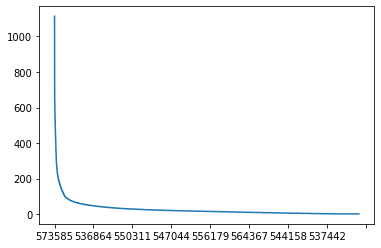

In [17]:
df['BillNo'].value_counts().plot()

In [18]:
df['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2265
JUMBO BAG RED RETROSPOT               2084
REGENCY CAKESTAND 3 TIER              1929
PARTY BUNTING                         1676
LUNCH BAG RED RETROSPOT               1570
                                      ... 
PURPLE/TURQ FLOWERS HANDBAG              1
PINK BAROQUE FLOCK CANDLE HOLDER         1
SET OF 3 PINK FLYING DUCKS               1
PAINTED HEART WREATH WITH BELL           1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Itemname, Length: 4006, dtype: int64

In [19]:
df['Itemname'].value_counts().describe()

count    4006.000000
mean      129.693709
std       190.410578
min         1.000000
25%        15.000000
50%        63.000000
75%       162.000000
max      2265.000000
Name: Itemname, dtype: float64

<AxesSubplot:>

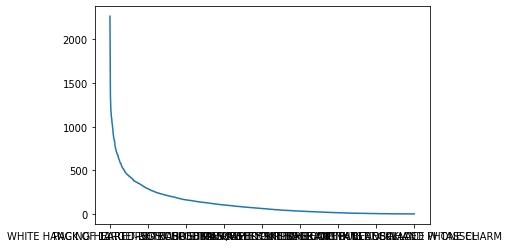

In [20]:
#df['Itemname'].value_counts().plot.bar()
df['Itemname'].value_counts().plot()

**Uma ideia que podemos explorar depois, de um modelo genérico, é ver regras de associação para diferentes países (talvez comparar UK, France e Germany, por conta de volumetria de transações)**

In [21]:
df.groupby('BillNo')['Itemname'].unique()

BillNo
536365     [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366     [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367     [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368     [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                            [BATH BUILDING BLOCK WORD]
                                 ...                        
572057     [TEA TIME OVEN GLOVE, FRYING PAN UNION FLAG, N...
572058     [DOOR HANGER  MUM + DADS ROOM, BAKING MOULD CH...
A563185                                    [Adjust bad debt]
A563186                                    [Adjust bad debt]
A563187                                    [Adjust bad debt]
Name: Itemname, Length: 19563, dtype: object

## VD vs VI

BillNo, Itemname, Quantity, Date, Price, CustomerID, Country, totalvalue

**Vemos que existem 3 transações que são erros e elas são alfanuméricas. Vamos eliminar as transações que sejam alfanuméricas**

In [22]:
df_ajustado = df[~(df.BillNo.str.contains('[A-Z]')==True)].groupby('BillNo')['Itemname']\
                        .unique().values

### Preparação dos dados para modelos de regras de associação
- biblioteca que achei interessante para Python: http://rasbt.github.io/mlxtend/

In [23]:
!pip install mlxtend

**Precisamos ajustar o dataframe de tal forma que cada linha contenha todos os itens adquiridos na transação**

- existem diversas formas de fazer isso, mas como encontrei essa biblioteca mlxtend, basicamente, o que precisamos fazer é criar um dataframe em que cada coluna é um produto e os valores são True ou False, dependendo se a transação contém ou não o item

- para fazer esse dataframe, vamos usar do TransactionEncoder()

In [24]:
from mlxtend.preprocessing import TransactionEncoder
transaction_enc = TransactionEncoder()
transaction_enc_array = transaction_enc.fit_transform(df_ajustado)

In [25]:
df_transactions = pd.DataFrame(transaction_enc_array,columns=transaction_enc.columns_)

In [26]:
df_transactions

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19555,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19556,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19557,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19558,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Teste de alguns modelos de regras de associação, verificação de métricas chaves (support, confidence, lift), explorar algumas associações, ver ideias de gráficos que podemos usar...